## Sister Classification Model

* Model to classify between sisters
* Image data loaded into sisters directory


In [1]:
from fastbook import *

In [321]:
path = Path('sisters')
sister_types = 'darrigan','isabella'

In [322]:
fns = get_image_files(path)
fns

(#144) [Path('sisters/darrigan/IMG_4464.jpg'),Path('sisters/darrigan/IMG_1288.jpg'),Path('sisters/darrigan/IMG_0976.jpg'),Path('sisters/darrigan/IMG_6225.jpg'),Path('sisters/darrigan/IMG_6226.jpg'),Path('sisters/darrigan/IMG_5779.jpg'),Path('sisters/darrigan/IMG_5780.jpg'),Path('sisters/darrigan/IMG_1220.jpg'),Path('sisters/darrigan/IMG_1206.jpg'),Path('sisters/darrigan/IMG_1216.jpg')...]

In [323]:
failed = verify_images(fns)
failed

(#0) []

In [324]:
failed.map(Path.unlink)

(#0) []

In [325]:
sisters = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [326]:
dls = sisters.dataloaders(path)

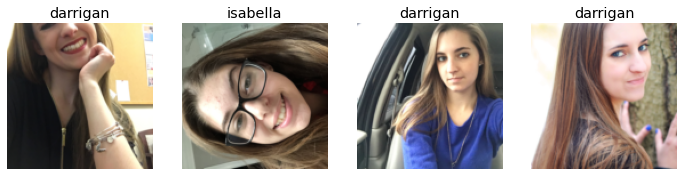

In [327]:
dls.valid.show_batch(max_n=4, nrows=1)

In [328]:
sisters = sisters.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                     batch_tfms=aug_transforms())
dls = sisters.dataloaders(path)

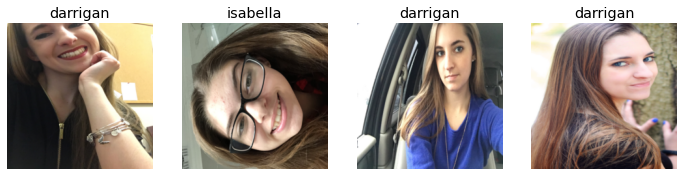

In [329]:
dls.valid.show_batch(max_n=4, nrows=1)

In [330]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.368327,0.585742,0.285714,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.405857,0.538347,0.321429,00:12
1,1.127944,0.477425,0.321429,00:11
2,0.998077,0.435557,0.285714,00:11


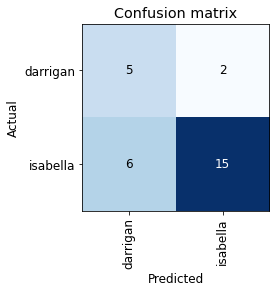

In [331]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

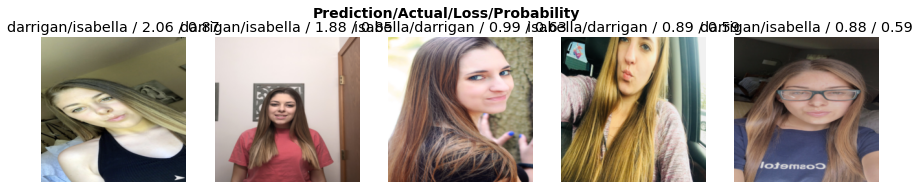

In [332]:
interp.plot_top_losses(5, nrows=1)

In [333]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [334]:
# for idx in cleaner.delete(): 
#     print('Deleting')
#     cleaner.fns[idx].unlink()

In [335]:
learn.export()

In [336]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [337]:
learn_inf = load_learner(path/'export.pkl')

In [347]:
learn_inf.predict('images/darrigan3.jpg')

('darrigan', TensorImage(0), TensorImage([0.7015, 0.2985]))

In [339]:
learn_inf.dls.vocab


['darrigan', 'isabella']